<center>
<h2> Vehicle Sales Data Analytics  </h2> 

<h3 style="color: #3366ff;">Notebook Overview</h3>

<p>This Jupyter Notebook provides a comprehensive and integrated analysis of the <em>"Vehicle Sales and Market Trends Dataset"</em>. This dataset offers a wealth of information about vehicle sales transactions, including details such as make, model, condition, selling prices, and more. The unique aspect of this notebook is the simultaneous visualization and reporting of insights, which allows for a more integrated and comprehensive understanding of the data.</p>

<h4 style="color: #3366ff;">Dataset Overview:</h4>

<p>The "Vehicle Sales and Market Trends Dataset" provides a comprehensive collection of information pertaining to the sales transactions of various vehicles.</p>

<h5 style="color: #3366ff;">File Details:</h5>

<ul>
<li><strong>Lines:</strong> 450k+</li>
<li><strong>Columns:</strong> 16</li>
</ul>

<h5 style="color: #3366ff;">Data Content:</h5>

<p>This dataset encompasses details such as the year, make, model, trim, body type, transmission type, VIN (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.</p>
<h4 style="color: #3366ff;">Key Sections:</h4>

<ul>
<li><strong>Data Import and Exploration:</strong> The notebook begins with the import of necessary libraries and the loading of the dataset. It then explores the dataset's structure, dimensions, and missing values.</li>

<li><strong>Data Cleaning and Transformation:</strong> This section focuses on cleaning and transforming the data. It handles missing values, converts data types, and addresses inconsistencies in categorical columns.</li>

<li><strong>Integrated Data Visualization and Reporting:</strong> After cleaning the data, the notebook visualizes the dataset using various plots and charts, while simultaneously reporting insights. It performs correlation analysis, highlights key observations and trends, and suggests recommendations or further actions based on the analysis.</li>
</ul>

<p>Throughout the notebook, various Python packages are utilized, including pandas, matplotlib, seaborn, and scikit-learn, among others. These packages enable data manipulation, visualization, and statistical analysis to extract meaningful insights from the dataset.</p>

<p>Overall, this notebook serves as a comprehensive guide to understanding the characteristics and patterns within the vehicle sales data, helping to understand market trends, consumer preferences, and pricing strategies.</p>


<h3 style="color: #3366ff;">1. Data Import and Exploration</h3>

In [2]:
# Importing necessary libraries for data analysis and visualization

# numpy is used for numerical computations in Python
import numpy as np

# pandas is used for data manipulation and analysis
import pandas as pd

# matplotlib.pyplot is a plotting library used for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt

# seaborn is a Python data visualization library based on matplotlib
import seaborn as sns

# warnings is a standard Python library used to suppress warning messages
import warnings

# termcolor library is used to color the text in the console
from termcolor import colored

# Ignore all warning messages that might appear during the execution of the program
warnings.filterwarnings('ignore')

# Set the aesthetic style of the plots. This affects things like the color of the axes, whether a grid is enabled by default, and other aesthetic elements
sns.set_style()

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

The describe_data function takes a pandas DataFrame as an argument and prints out various pieces of information about the data:

In [3]:
def describe_data(data):
    # Print the shape of the DataFrame
    print(colored("Shape of the data:", 'blue'))
    print(data.shape)
    
    # Print the column names of the DataFrame
    print(colored("\nColumns in the data:", 'green'))
    print(data.columns)
    
    # Print information about the DataFrame like the column dtypes and non-null values
    print(colored("\nInformation about the data:", 'cyan'))
    data.info()
    
    # Print statistical summary of the numerical columns
    print(colored("\nDescription of numerical data:", 'magenta'))
    print(data.describe().T)
    
    # Print statistical summary of the non-numerical columns
    print(colored("\nDescription of non-numerical data:", 'yellow'))
    print(data.describe(exclude='number').T)

Firstly, I will read the csv file:

In [4]:
# Use the function
data = pd.read_csv('car_prices.csv')


<h4 style="color: #3366ff;"> Understanding Data 📊</h4>

In [5]:
describe_data(data)

Shape of the data:
(457731, 16)

Columns in the data:
Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

Information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457731 entries, 0 to 457730
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          457731 non-null  int64  
 1   make          449532 non-null  object 
 2   model         449460 non-null  object 
 3   trim          449203 non-null  object 
 4   body          446659 non-null  object 
 5   transmission  405706 non-null  object 
 6   vin           457731 non-null  object 
 7   state         457731 non-null  object 
 8   condition     445929 non-null  float64
 9   odometer      457641 non-null  float64
 10  color         457088 non-null  object 
 11  interior      457088 

<h4 style="color: #3366ff;"> Raw Data Overview 📊</h4>

1. Initially, our dataset consists of 457731 rows and 16 columns. Out of these 16 columns, 5 are of integer type and the remaining 11 are string or object type.

2. Based on our statistical analysis, the Manheim Market Report (MMR) and Selling Price values are relatively similar. The maximum odometer reading is 999999, which, while high, is not implausible.

3. The dataset includes cars manufactured as far back as 1982, indicating the potential presence of Vintage Cars.

<h3 style="color: #3366ff;">2. Data Cleaning and Transformation</h3>

<h4 style="color: #3366ff;"> Data Cleaning 📊</h4>

Here is the column names of data and the values are the percentage of missing values in each column.

In [6]:
data.isnull().sum()/data.count()*100

year             0.000000
make             1.823897
model            1.840208
trim             1.898474
body             2.478849
transmission    12.823325
vin              0.000000
state            0.000000
condition        2.646610
odometer         0.019666
color            0.140673
interior         0.140673
seller           0.000000
mmr              0.003933
sellingprice     0.001966
saledate         0.001966
dtype: float64

The dataset contains numerous missing values. The 'Transmission' column has the most, with about 13% of its data missing, which is a significant amount. Other columns like 'Make', 'Model', 'Trim', 'Body', and 'Condition' have between 1%-2% missing values. The remaining columns have less than 1% missing values.

I'm going to remove the missing values. We have good number of data points and the missing values is less the 5% in almost all of the columns besides of 'Transmission' column as it has 13% of values missing. 

In [7]:
# We are filling missing values with 'Automatic' because it is the most used transmission type.

data['transmission'].fillna('automatic', inplace=True)

This will remove any rows in the dataset (data) that contain missing or incomplete information.

In [8]:
data.dropna(axis=0, inplace=True)

Now, let's verify the percentage of missing values in each column of our dataset. 

In [9]:
data.isnull().sum()/data.count()*100

year            0.0
make            0.0
model           0.0
trim            0.0
body            0.0
transmission    0.0
vin             0.0
state           0.0
condition       0.0
odometer        0.0
color           0.0
interior        0.0
seller          0.0
mmr             0.0
sellingprice    0.0
saledate        0.0
dtype: float64

We have successfully removed all the missing values either by removing them or replacing them with the alternative.

<h4 style="color: #3366ff;"> Data Transformation 📊</h4>

We have Year and Sale date columns which should be of datetime data type but they are in int and object type so we'll convert them.

In [10]:
# Since year is a time based data, the best approach is to convert it into datetime data type.

data['year'] = pd.to_datetime(data['year'], format='%Y').dt.year

In [11]:
data['saledate'] = pd.to_datetime(data['saledate'], utc=True, format='mixed').dt.date

Then, let's see the unique values in the 'condition' column of our dataset.

In [12]:
data['condition'].unique()

array([ 5., 45., 41., 43.,  1., 34.,  2., 42.,  3., 48., 49., 17., 19.,
       29., 38., 44., 47., 32.,  4., 25., 37., 39., 31., 28., 46., 36.,
       35., 26., 21., 22., 27., 24., 33., 23., 15., 16., 18., 12., 14.,
       11., 13.])

We get an array of distinct values that the 'condition' column can take. These values represent different conditions in our vehicle sales data.



The condition column have values such as 45, 59, 34 etc but this is not correct as it is a column which should have values between 1-5 as rating.

Let's change it into 1 to 5.

In [13]:
data['condition'].replace(range(10, 21), 1, inplace=True)
data['condition'].replace(range(20, 31), 2, inplace=True)
data['condition'].replace(range(30, 41), 3, inplace=True)
data['condition'].replace(range(40, 51), 4, inplace=True)

In [14]:
data['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [15]:
data['interior'].unique()

array(['black', 'beige', 'tan', 'brown', 'gray', '—', 'burgundy', 'white',
       'silver', 'off-white', 'red', 'yellow', 'green', 'purple', 'blue',
       'orange', 'gold'], dtype=object)

In the 'Color' and 'Interior' columns, we encounter the value '-', which is not accurate. Since we lack specific knowledge about what this color should be, we'll replace it with 'MultiColor'. 

This custom value not only gives meaning to our data but also prevents us from adding more values to a specific color. 

Thus, any data points in the 'Color' and 'Interior' columns with a value of '-' are replaced with 'Multicolor'.

In [16]:
data['color'].replace('—', 'multicolor', inplace=True)
data['interior'].replace('—', 'multicolor', inplace=True)

'Body' column values have some inconsistensies like Sedan, sedan or SUV, suv. Therefore, Let's convert them to lower case

In [17]:
data['body'] = data['body'].str.lower()

The 'Model', 'Trim', 'Vin', and 'Seller' columns won't significantly aid our analysis. 'Model' and 'Trim' can cause high dimensionality, 'Vin' is unique per vehicle and doesn't offer aggregate insights, and 'Seller' is not necessary for a general vehicle sales analysis. Therefore, we'll drop these columns.

In [18]:
data = data.drop(['model', 'trim', 'vin', 'seller'], axis=1)

Let's display the first few rows of our cleaned dataset to get a glimpse of the data we'll be working with.

In [19]:
data.head()

,year,make,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saledate
0,2015,Kia,suv,automatic,ca,5.0,16639.0,white,black,20500.0,21500.0,2014-12-16
1,2015,Kia,suv,automatic,ca,5.0,9393.0,white,beige,20800.0,21500.0,2014-12-16
2,2014,BMW,sedan,automatic,ca,4.0,1331.0,gray,black,31900.0,30000.0,2015-01-14
3,2015,Volvo,sedan,automatic,ca,4.0,14282.0,white,black,27500.0,27750.0,2015-01-28
4,2014,BMW,sedan,automatic,ca,4.0,2641.0,gray,black,66000.0,67000.0,2014-12-18


<h3 style="color: #3366ff;">Data Visualization of Vehicle Sales:</h3>

<p>This section of the notebook focuses on visualizing the vehicle sales data to extract meaningful insights and patterns. Various types of plots are used to represent different aspects of the data.</p>

<ul>
<li><strong>Count Plot:</strong> Count plots are used to show the distribution of categorical variables, such as vehicle make and model.</li>

<li><strong>Heat Map:</strong> Heat maps are used to visualize the correlation between different numerical variables.</li>

<li><strong>Box Plot:</strong> Box plots are used to display the distribution and outliers of numerical variables, such as selling price.</li>

<li><strong>Histogram:</strong> Histograms are used to visualize the distribution of numerical variables, such as selling price and odometer reading. They can help identify skewness, outliers, and the central tendency of the data.</li>

<li><strong>Scatter Plot:</strong> Scatter plots are used to visualize the relationship between two numerical variables, such as selling price and MMR. They can help identify trends, correlations, and outliers in the data.</li>

<li><strong>Regression Plot:</strong> Regression plots are used to visualize the relationship between two numerical variables and fit a regression line to the data, such as selling price and MMR. They can help identify trends and the strength of the relationship between variables.</li>

<li><strong>And More:</strong> Other types of plots, such as line plots and bar plots, are also used where appropriate to visualize trends, relationships, and distributions in the data.</li>
</ul>

<p>Each plot is accompanied by an explanation of the insights and patterns it reveals about the vehicle sales data.</p>

Let's define a function to create a Count Plot so we don't have to write all the necessary lines again and again.

In [20]:
def countplot(col, label, rotation=0, size=(12,6)):
    '''
    Create Count Plot using seaborn library.
    It takes four arguments.

    col (str): The column used to create countplot
    label (str): Name of x-label and it is also used as title.
    rotation (int): How much you want to rotate the x-ticks.
    size (tuple): It is a tuple and takes the size for figure in (width, height) format.
    '''
    # Set the style of the plot
    sns.set_style("whitegrid")
    
    plt.figure(figsize=size)
    plt.title(f'Count by Car {label}', fontsize=20)
    
    # Create the countplot with a different palette for more contrast
    sns.countplot(x=data[col], palette='rocket')   
    
    plt.xlabel(label, fontsize=16)
    plt.xticks(rotation=rotation)
    plt.ylabel('Count', fontsize=16)
    
    # Remove the top and right spines from plot for a cleaner look
    sns.despine()

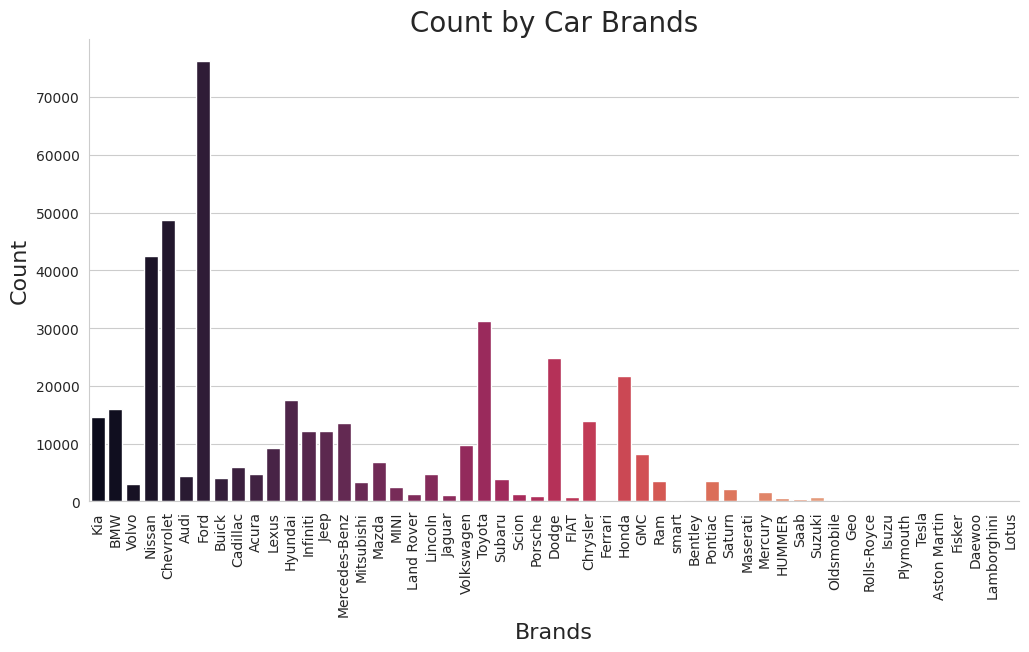

In [21]:
countplot('make', 'Brands', 90)

* *Ford, Chevrolet, Nissan, Toyota, and Dodge* being the top 5 brands by count suggests that these brands have a significant presence in the market.
* The high count of these brands might indicate a strong consumer preference for them. This could be due to various factors such as the reliability of the vehicles, cost-effectiveness, availability of spare parts, or the resale value.

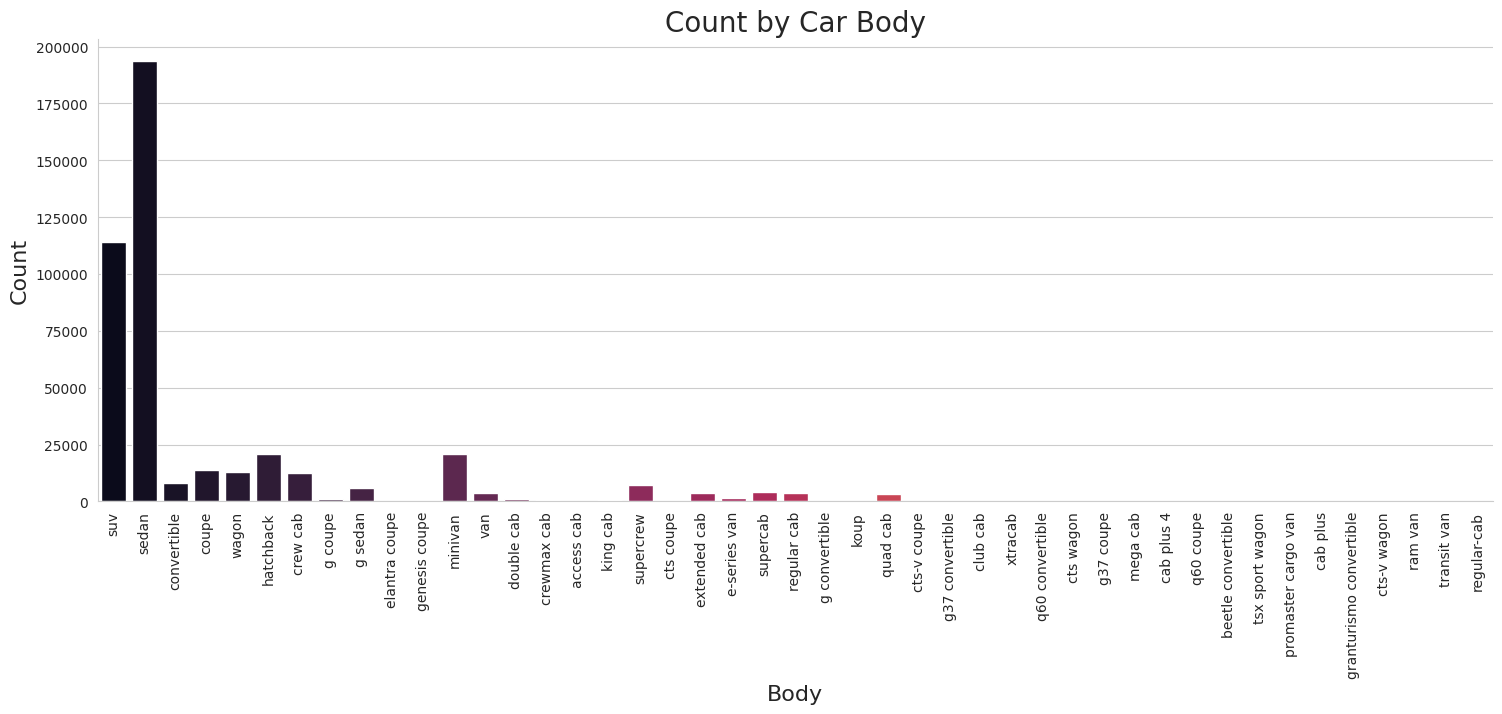

In [22]:
countplot('body', 'Body', 90, (18,6))

* *Sedan and SUV* are the top 2 body types used in cars.
* The popularity of sedans and SUVs indicates strong consumer preferences for these body types, likely due to their versatility, comfort, and design.
* *Sedans* have traditionally been favored for their fuel efficiency and ease of driving, while *SUVs* are increasingly popular for their spaciousness and capability.

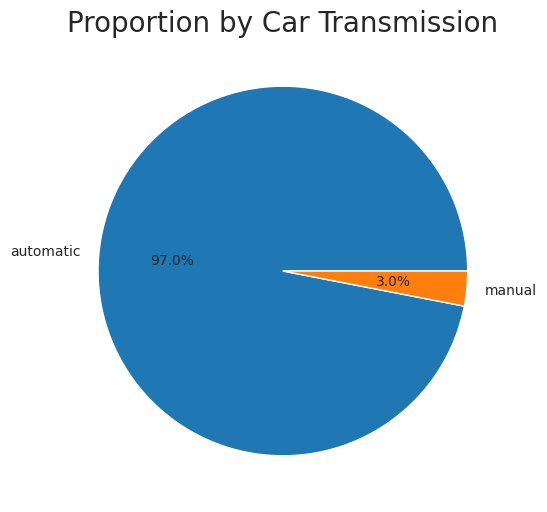

In [25]:
# Set the style of the plot
sns.set_style("whitegrid")
# Create a new figure with a specified size
plt.figure(figsize=(12,6))

# Set the title of the plot
plt.title('Proportion by Car Transmission', fontsize=20)

# Create the pie plot
data['transmission'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Remove the y-label as it's not needed in a pie chart
plt.ylabel('')

# Display the plot
plt.show()

* Automtic transmission is most counted, it also maked the dataset imbalanced based on transmission.
* A higher count of automatic transmissions implies a strong consumer preference for this type, possibly due to ease of use and convenience.
* The automotive industry has seen a shift towards automatic transmissions over the years, which could be reflected in the dataset.

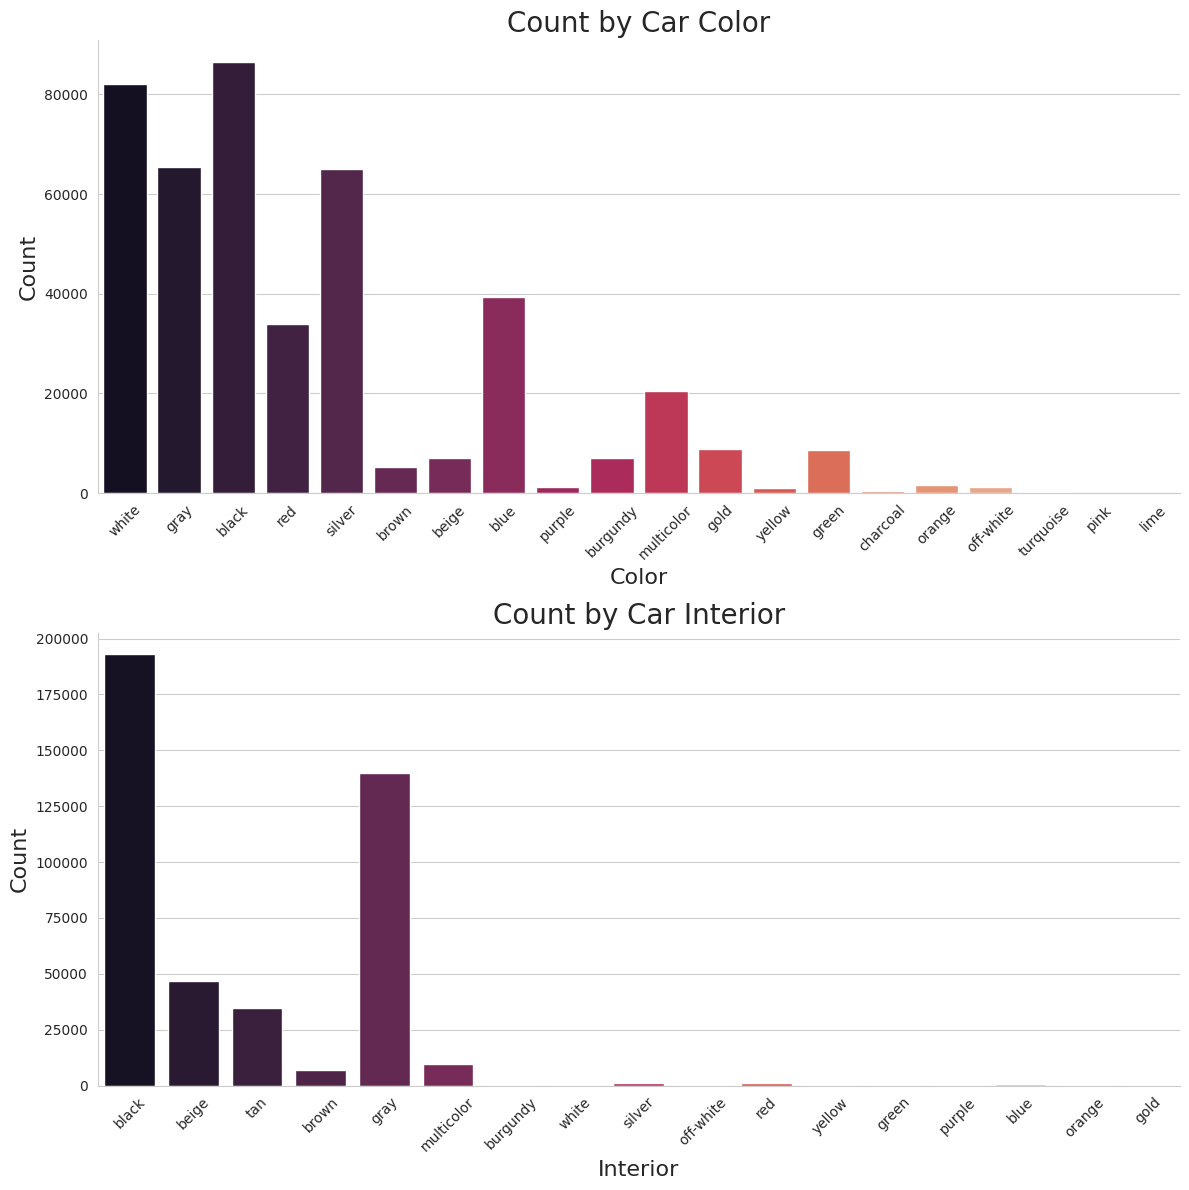

In [ ]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Create a countplot for color
plt.sca(ax1)
sns.countplot(x=data['color'], palette='rocket')
plt.title('Count by Car Color', fontsize=20)
plt.xlabel('Color', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=16)

# Create a countplot for interior
plt.sca(ax2)
sns.countplot(x=data['interior'], palette='rocket')
plt.title('Count by Car Interior', fontsize=20)
plt.xlabel('Interior', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=16)

# Remove the top and right spines from plot for a cleaner look
sns.despine()

plt.tight_layout()
plt.show()

* There are different color cars but 'Black' and 'Grey' are the most used interior color.
* These colors are versatile and tend to match well with various exterior colors, making them a safe choice for consumers.
* Neutral colors like black and grey are believed to retain better resale value compared to more vibrant or unique colors.
* Darker interiors may be preferred due to their practicality in hiding stains and wear.

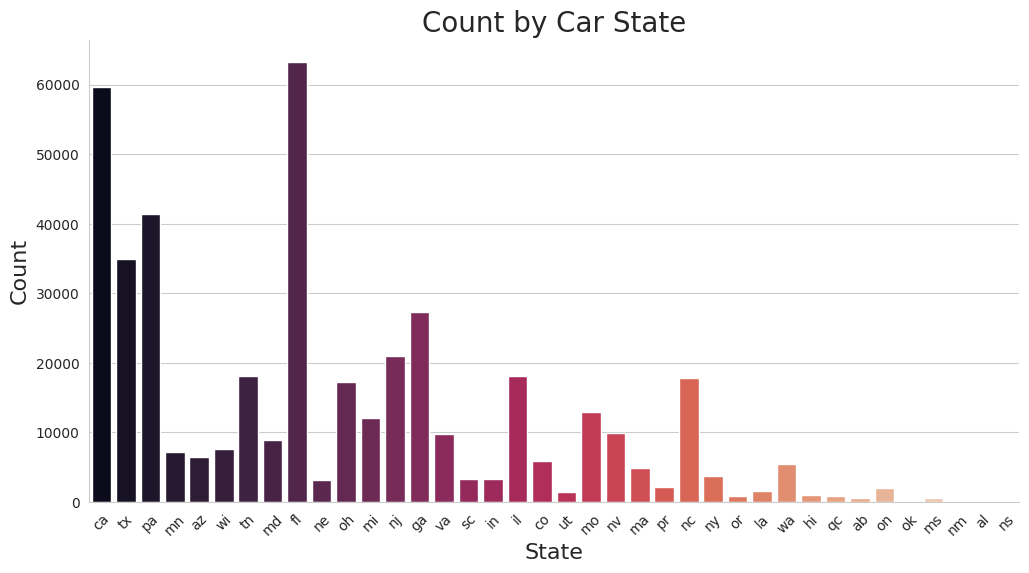

In [ ]:
countplot('state', 'State', 45)

* Florida and California have 70k-80k and more cars while all other are below 50k cars.
* Florida and California are populous states with large urban areas, which could contribute to the higher number of cars.
* Both states have robust economies, potentially allowing more residents to own cars.
* Florida’s tourism and California’s climate may influence car ownership for leisure and travel purposes.

In [ ]:
def boxplot(col, label):
    '''
        Create Boxplot from the given data series.

        col (string): Used as column for dataframe.

        label (string): Used as label and title for chart.
    
    '''
    # Set the style of the plot
    sns.set_style("whitegrid")
    
    plt.figure(figsize=(10,6))
    sns.boxplot(data[col], palette='Blues')
    plt.title(label, fontsize=20)
    plt.ylabel(label, fontsize=16)
    
    # Remove the top and right spines from plot for a cleaner look
    sns.despine()


def histplot(col, label):
    '''
        Create Histogram from the given data series.

        col (string): Used as column for dataframe.

        label (string): Used as label and title for chart.
    
    '''
    # Set the style of the plot
    sns.set_style("whitegrid")
    
    plt.figure(figsize=(10,6))
    sns.histplot(data[col], palette='rocket')
    plt.title(label, fontsize=20)
    plt.xlabel(label, fontsize=16)
    
    # Remove the top and right spines from plot for a cleaner look
    sns.despine()

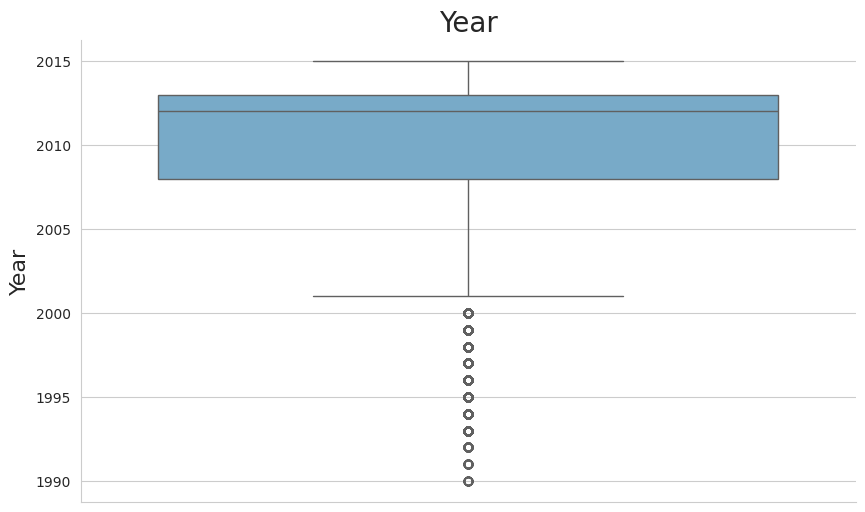

In [ ]:
boxplot('year', 'Year')

* The range of manufacturing years for cars in our dataset spans from 2000 to 2015. However, there are outliers present, with some cars manufactured in 1990 or earlier. This could indicate the presence of classic or vintage cars in our dataset.
* The outliers suggest that the dataset includes classic or vintage cars, which could be of special interest to collectors or enthusiasts.
*  Older cars, especially those considered classics, can have higher valuations due to their rarity and historical value.
*  The inclusion of older cars may impact maintenance strategies and parts inventory, as these vehicles often require specialized care.

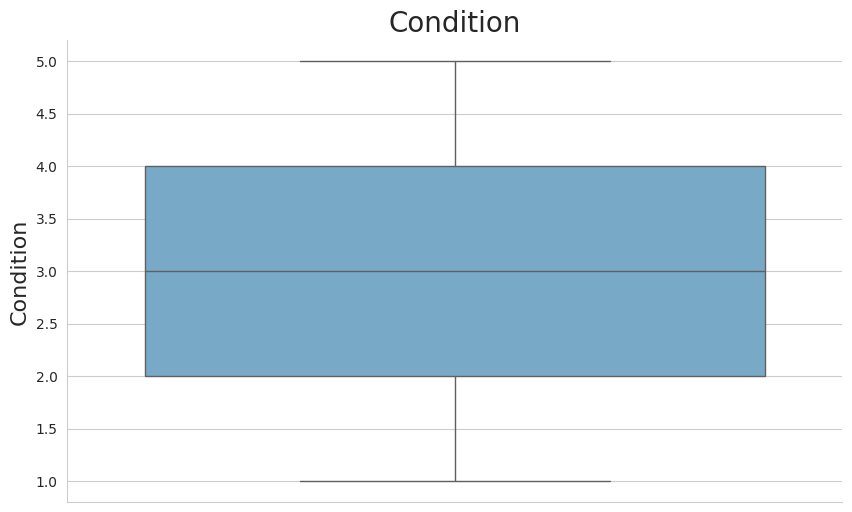

In [ ]:
boxplot('condition', 'Condition')

* The majority of cars in our dataset have a condition rating between 2 and 4. However, there are also cars with the lowest condition rating of 1 and the highest rating of 5. This suggests a wide range of vehicle conditions in our data, from poor to excellent.
* The wide range of conditions suggests a diverse inventory that caters to different customer needs and budgets.

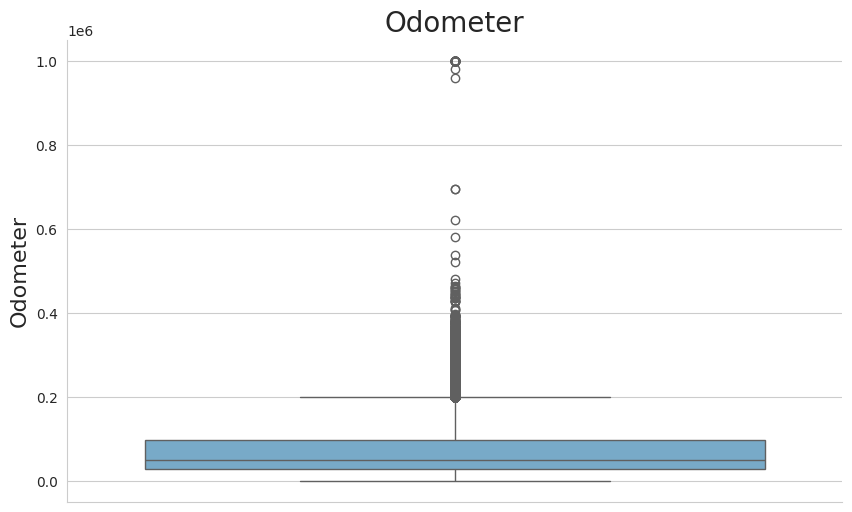

In [ ]:
boxplot('odometer', 'Odometer')

* The maximum odometer reading in our dataset is approximately 200,000 miles. However, there are notable outliers, with some cars reported to have traveled as much as 999,999 miles. This extreme mileage seems impossible and may indicate data entry errors. In real-world scenarios, such high mileage is rare and could significantly impact a vehicle's value and desirability.
* High-mileage vehicles are less common and could indicate well-maintained cars or those used for commercial purposes.
* Such high mileage can greatly affect a car’s value, potentially making it less desirable for resale.

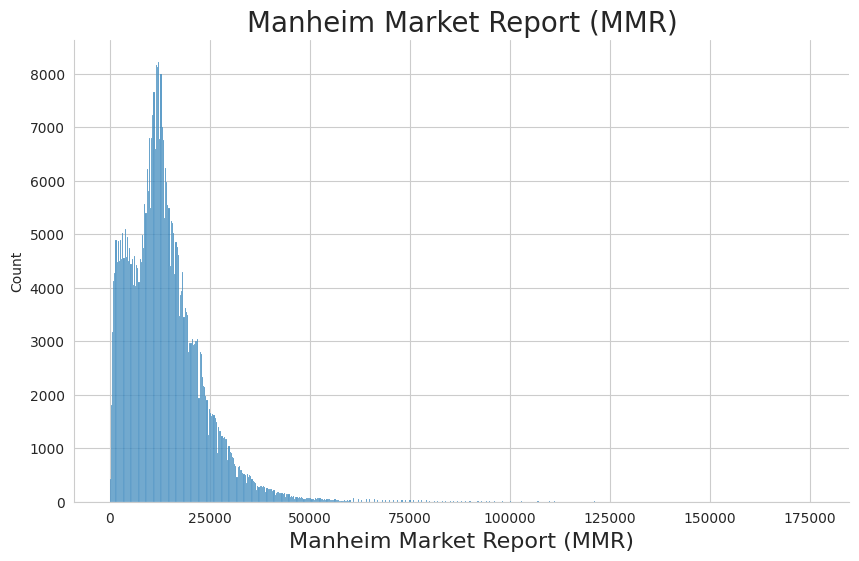

In [ ]:
histplot('mmr', 'Manheim Market Report (MMR)')

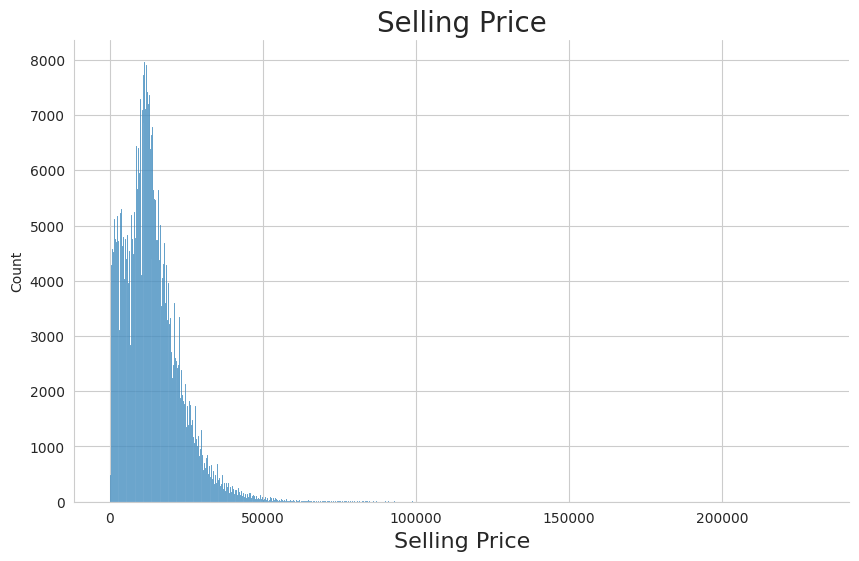

In [ ]:
histplot('sellingprice', 'Selling Price')

* The Manheim Market Report (MMR) and Selling Price values in our dataset are quite similar. A significant number of cars fall within the price range of 10,000 to 20,000. Both these distributions are right-skewed, indicating that while most cars are priced in this range, there are also a few cars with significantly higher prices. This could reflect a market where the majority of transactions involve moderately priced vehicles, with a smaller segment of high-end or luxury vehicle

In [ ]:
cat_col = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller']
num_col = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

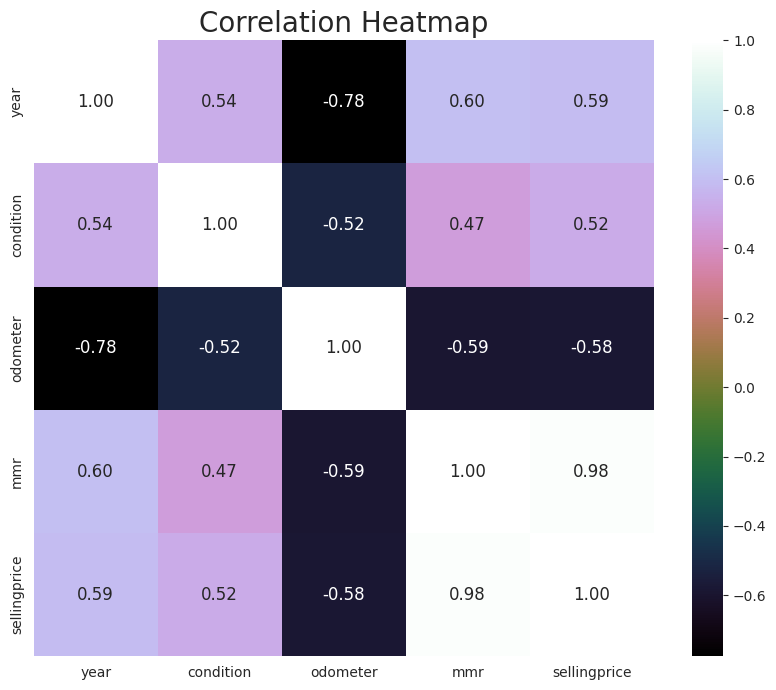

In [ ]:
plt.figure(figsize=(10,8))  # Increase the size of the heatmap
sns.set_style("whitegrid")  # Set the style of the plot
sns.heatmap(data[num_col].corr(), annot=True, fmt=".2f", cmap='cubehelix', annot_kws={'size': 12})  # Use a different color palette, format the annotations to 2 decimal places, and increase the annotation size
plt.title('Correlation Heatmap', fontsize=20)  # Add a title to the heatmap
plt.show()

* **Year vs. Odometer**: The correlation coefficient of -0.78 indicates a strong inverse relationship between the year of the vehicle and the odometer reading. This suggests that as the vehicle’s year of manufacture increases (i.e., the vehicle is newer), the odometer reading tends to decrease, which is consistent with the expectation that newer vehicles generally have less mileage.
* **MMR vs. Selling Price**: The correlation coefficient of 0.98 reveals an extremely strong positive relationship between the Market Making Rate (MMR) and the selling price. This implies that the selling price of a vehicle is highly predictable from its MMR, suggesting that the market value is a significant determinant of the selling price.
* **Condition**: The condition of the vehicle exhibits moderate positive correlations with both the year (0.54) and the selling price (0.59). This implies that vehicles in better condition tend to be newer and command higher selling prices.
* **Odometer vs. Condition**: A correlation coefficient of -0.52 indicates a moderate inverse relationship between the odometer reading and the condition of the vehicle. This suggests that vehicles with higher mileage tend to be in worse condition

In [ ]:
data.groupby('make')[['sellingprice', 'condition']].mean().sort_values(by=['sellingprice', 'condition'], ascending=False)

,sellingprice,condition
make,,
Rolls-Royce,151080.000000,3.900000
Ferrari,131555.555556,3.555556
Lamborghini,111500.000000,4.000000
Bentley,73883.132530,3.265060
Tesla,70714.285714,4.000000
Aston Martin,54961.111111,3.166667
Fisker,46791.666667,3.500000
Maserati,41333.333333,3.059524
Lotus,40800.000000,2.000000


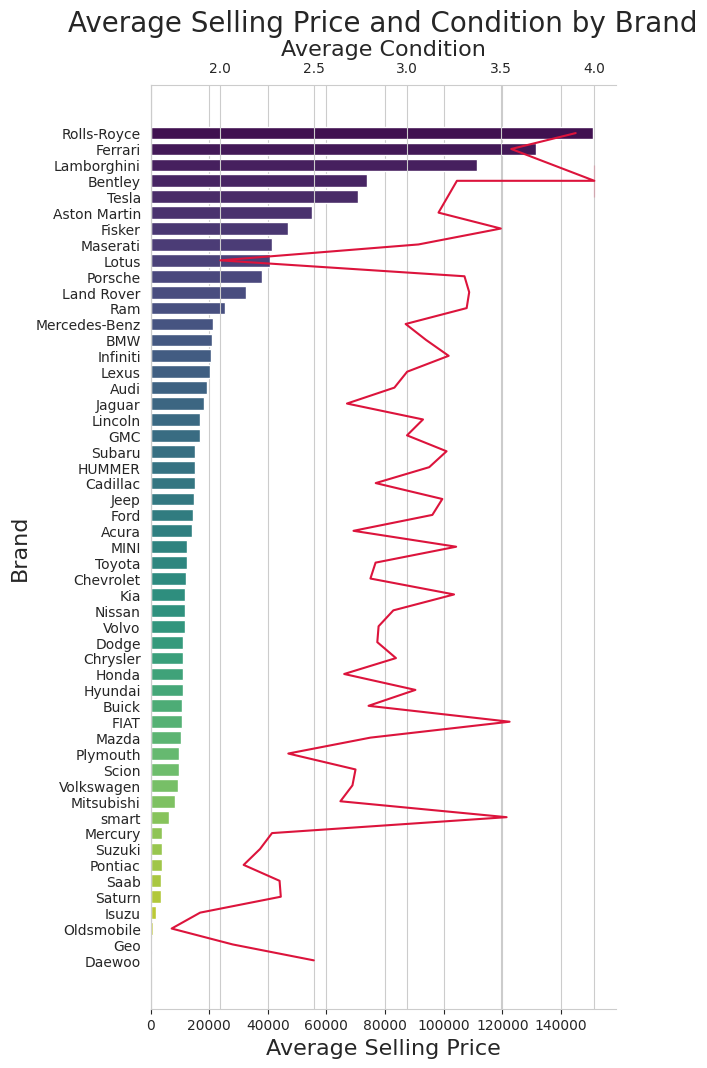

In [ ]:
# Group the data and reset the index
grouped_data = data.groupby('make')[['sellingprice', 'condition']].mean().sort_values(by=['sellingprice', 'condition'], ascending=False).reset_index()

# Set the style of the plot
sns.set_style("whitegrid")

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(6, 12))

# Create a horizontal bar plot for selling price
sns.barplot(y='make', x='sellingprice', data=grouped_data, ax=ax1, palette='viridis', orient='h')

# Create a second x-axis for condition
ax2 = ax1.twiny()
sns.lineplot(y='make', x='condition', data=grouped_data, ax=ax2, color='crimson', sort=False)

# Set the labels and title
ax1.set_ylabel('Brand', fontsize=16)
ax1.set_xlabel('Average Selling Price', fontsize=16)
ax2.set_xlabel('Average Condition', fontsize=16)
plt.title('Average Selling Price and Condition by Brand', fontsize=20)

# Remove the top and right spines from plot for a cleaner look
sns.despine(ax=ax2, top=False, bottom=True)
sns.despine(ax=ax1, bottom=False, top=True)

plt.show()

* The average price of the most expensive car brand in our dataset, Rolls Royce, is $153,456.25. Conversely, the cheapest car brand, Daewoo, has an average price of just $450.00. This highlights the wide range of car prices in our dataset, reflecting the diversity of the car market from luxury to budget vehicles.
* The line graph suggests that some luxury brands also have higher average conditions, implying a correlation between price and condition.

Lets define a function to generate different types of plots using seaborn and matplotlib libraries. This function takes in various parameters to customize the plot according to the user's needs.

In [ ]:
def create_plot(x, y, plot_type, data, hue=None, title=None, xlabel=None, ylabel=None, rotation=None, palette='viridis', alpha=None, figsize=(18,6)):
    # Create a new figure with the specified size
    plt.figure(figsize=figsize)
    
    # If a title is provided, set the title of the plot
    if title:
        plt.title(title, fontsize=20)
    
    # Depending on the plot_type, create the appropriate plot
    if plot_type == 'bar':
        sns.barplot(x=x, y=y, hue=hue, data=data, palette=palette ,errorbar=None)
    elif plot_type == 'scatter':
        sns.scatterplot(x=x, y=y, hue=hue, data=data, palette=palette, alpha=alpha)
    elif plot_type == 'line':
        sns.lineplot(x=x, y=y, hue=hue, data=data, palette=palette)
    elif plot_type == 'reg':
        sns.regplot(x=x, y=y, data=data, marker='o', color=".3", line_kws=dict(color="r"))  # pass data argument here
    
    # If x and y labels are provided, set them
    if xlabel:
        plt.xlabel(xlabel, fontsize=16)
    if ylabel:
        plt.ylabel(ylabel, fontsize=16)
    
    # If rotation is provided, rotate the x-axis labels
    if rotation:
        plt.xticks(rotation=rotation)

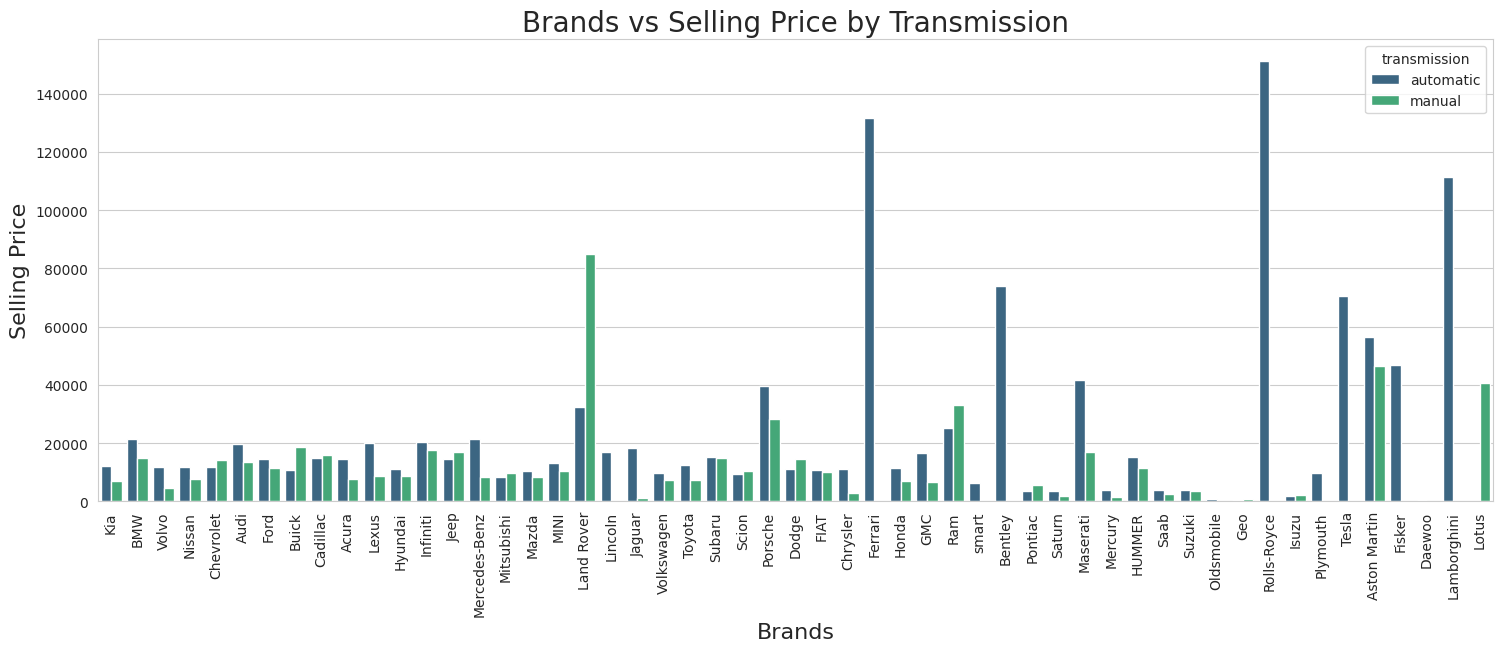

In [ ]:
create_plot(x='make', y='sellingprice', plot_type='bar', data=data, hue='transmission', title='Brands vs Selling Price by Transmission', xlabel='Brands', rotation=90, ylabel='Selling Price')



* The selling price of cars with automatic transmissions is generally higher across all brands, with the exception of Land Rover and Lotus. Interestingly, Lotus does not manufacture cars with automatic transmissions, and similarly, Rolls-Royce does not produce cars with manual transmissions.
* **Transmission Type Impact**: The graph reinforces the trend that automatic transmissions generally command a higher selling price, which could be due to consumer preferences for convenience or the higher cost associated with automatic transmission technology.
* **Market Positioning**: The absence of manual transmissions in Rolls-Royce vehicles aligns with the brand’s luxury positioning, where the emphasis is on comfort and effortless driving, typically associated with automatic transmissions.
* **Brand Exceptions**: Lotus’s lower-priced manual transmission cars suggest a focus on driving purism and performance, which is often preferred by driving enthusiasts who seek a more engaged driving experience.

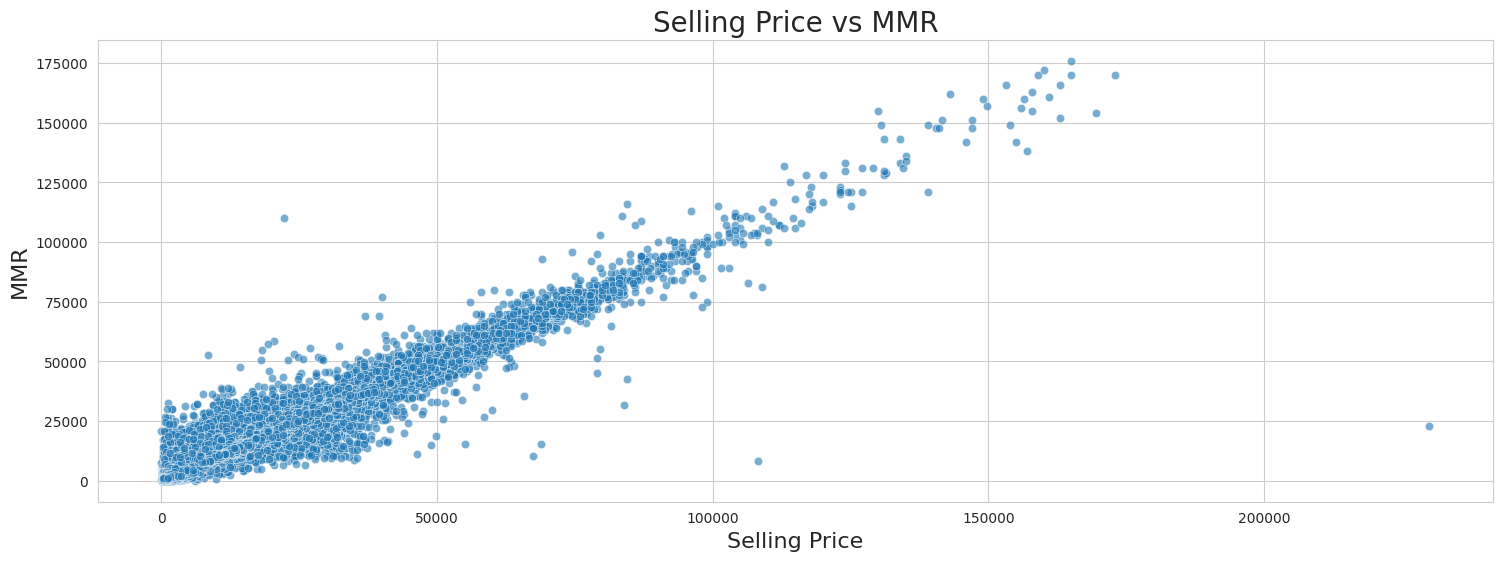

In [ ]:
create_plot(x='sellingprice', y='mmr', plot_type='scatter', data=data, title='Selling Price vs MMR', xlabel='Selling Price', ylabel='MMR', palette='magma', alpha=0.6)



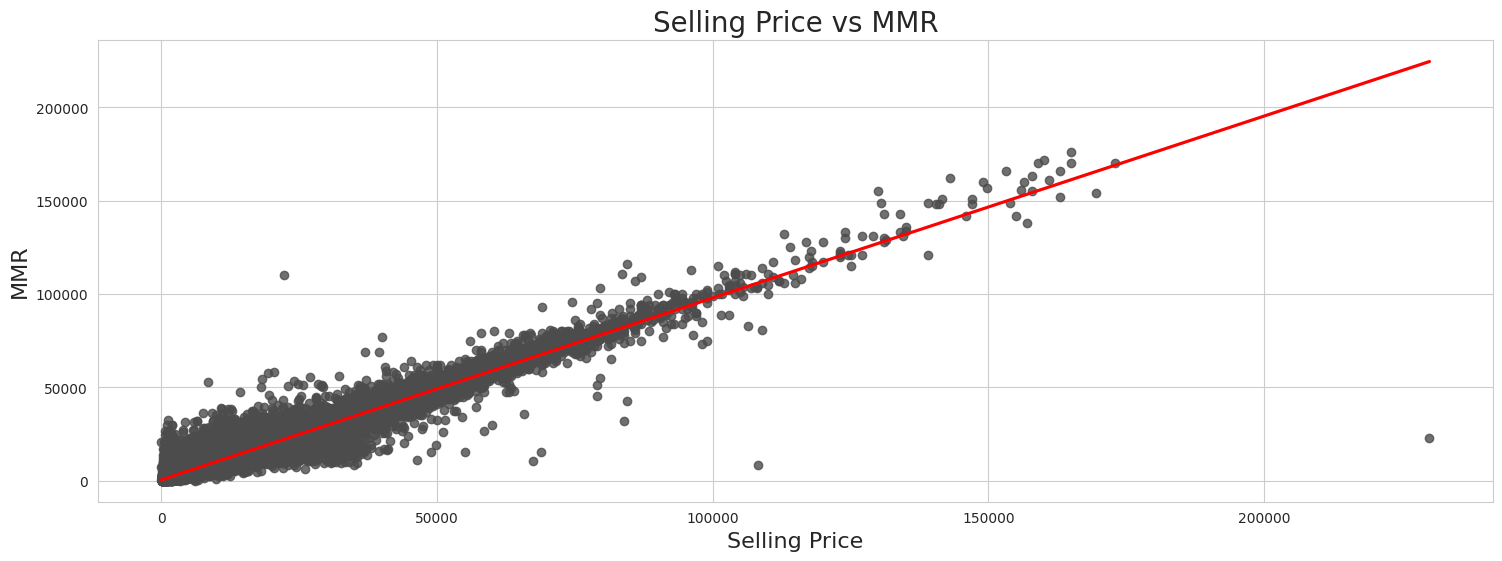

In [ ]:
create_plot(x='sellingprice', y='mmr', plot_type='reg', data=data, title='Selling Price vs MMR', xlabel='Selling Price', ylabel='MMR')


Our scatterplot and regression plot (regplot) reveal a strong correlation between the MMR (Manheim Market Report) values and the Selling Price. However, there are a few data points that significantly deviate from this general trend.

* **Positive Correlation**: The dense clustering of data points along the diagonal indicates a strong positive correlation, suggesting that higher MMR values are typically associated with higher Selling Prices.
* **Influence of MMR**: Given that MMR is a widely recognized benchmark for vehicle values in auctions, it’s likely that it plays a significant role in setting expectations for Selling Prices.
* **Significance of Outliers**: The outliers represent cases where the Selling Price deviates from the expected value based on MMR. These could be due to exceptional features, limited edition models, or other factors that add or subtract value independently of the MMR.

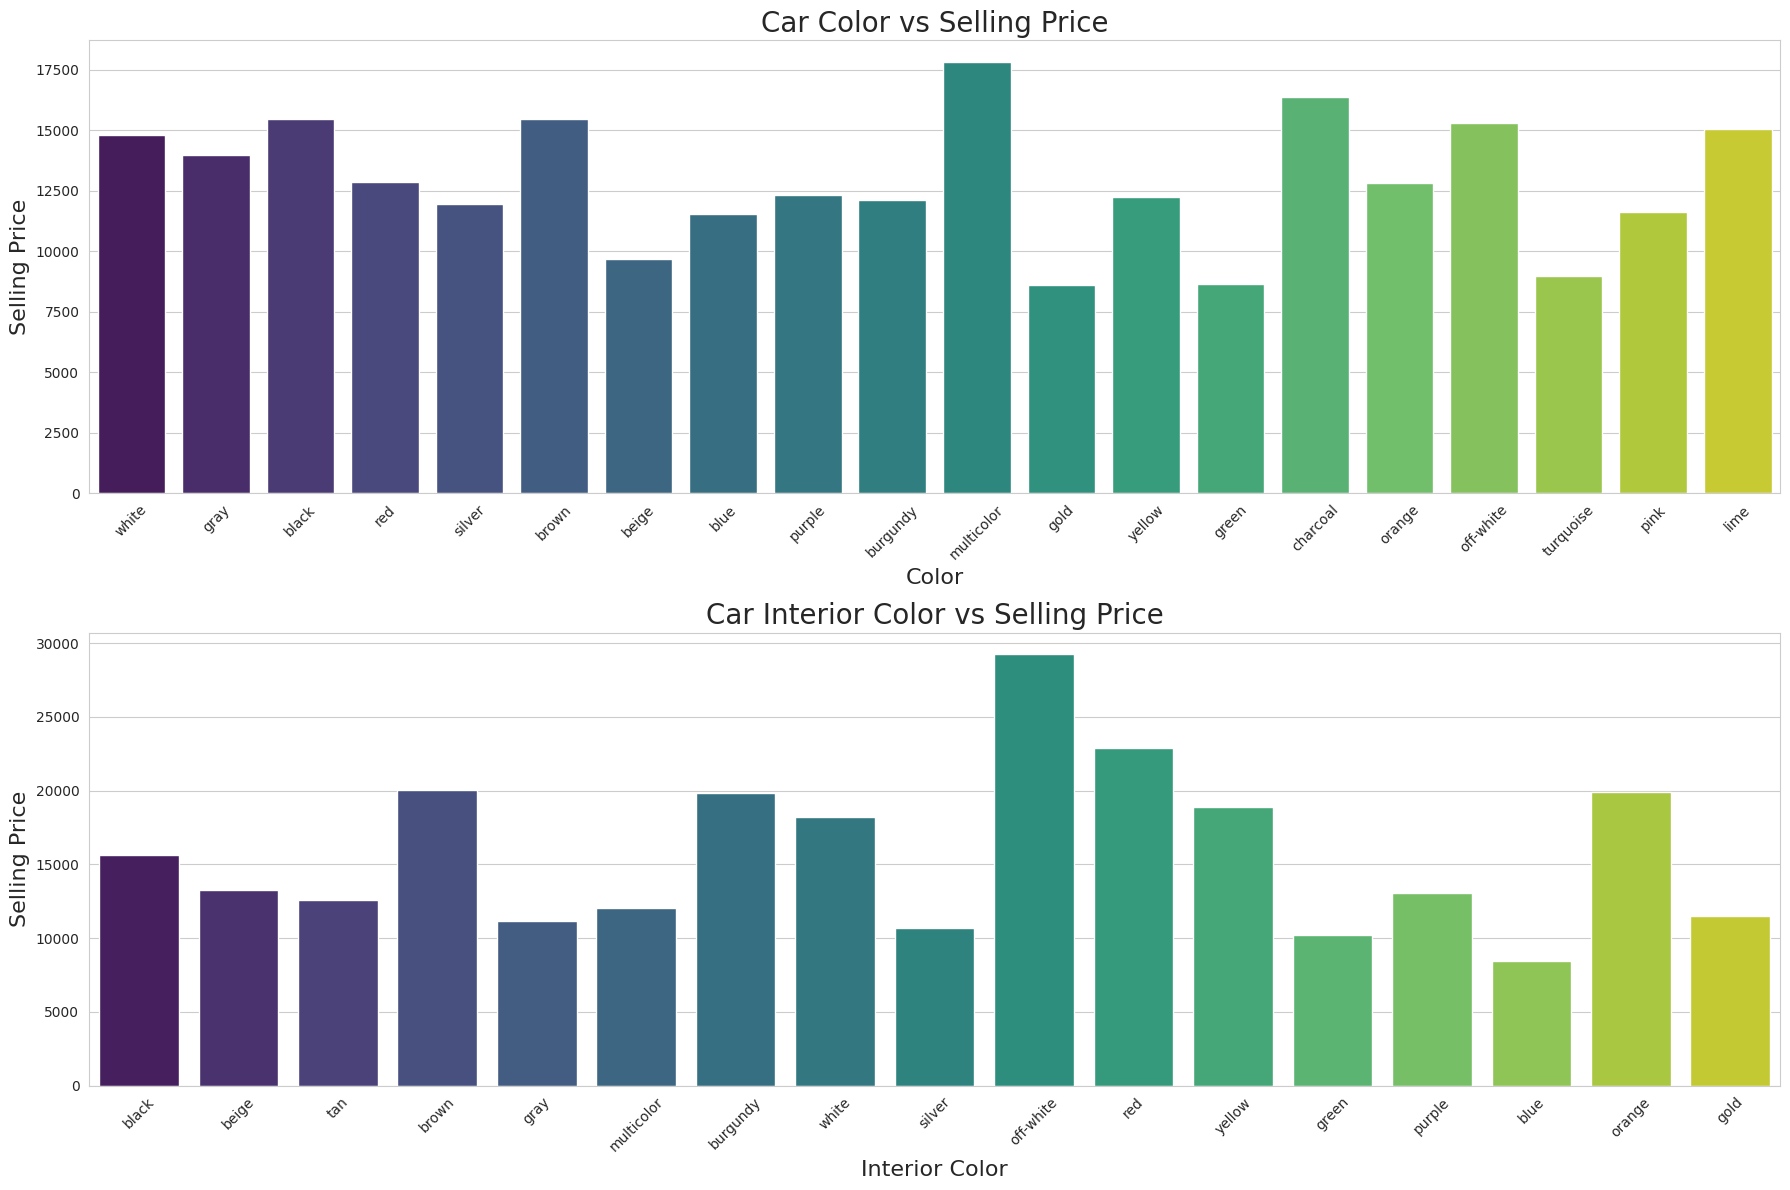

In [ ]:
# Create a figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# Create a bar plot for color vs selling price
plt.sca(ax1)
sns.barplot(x='color', y='sellingprice', data=data, palette='viridis', errorbar=None)
plt.title('Car Color vs Selling Price', fontsize=20)
plt.xlabel('Color', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Selling Price', fontsize=16)

# Create a bar plot for interior color vs selling price
plt.sca(ax2)
sns.barplot(x='interior', y='sellingprice', data=data, palette='viridis', errorbar=None)
plt.title('Car Interior Color vs Selling Price', fontsize=20)
plt.xlabel('Interior Color', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Selling Price', fontsize=16)

plt.tight_layout()
plt.show()

* The similar selling prices across different exterior colors suggest that color is not a primary consideration for buyers. This could be due to the availability of a wide range of colors in the market, making color a less distinctive feature.
* **Interior Color:** The spike in selling price for cars with orange interiors is intriguing. It may indicate a niche market where orange interiors are rare or sought after, possibly due to trends or personal preferences.
* **Buyer Priorities:** The data implies that buyers prioritize factors such as make, model, age, condition, and features over color. These attributes likely have a more direct impact on the car’s performance, safety, and comfort.

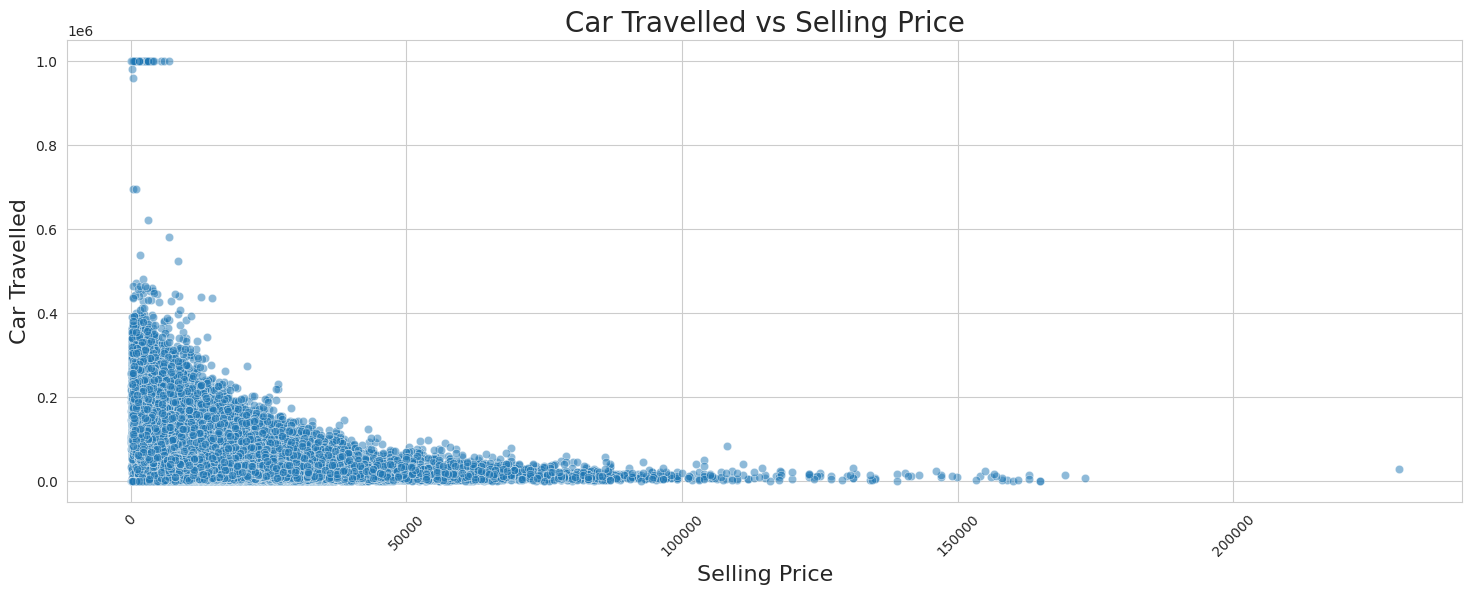

In [ ]:

create_plot(x='sellingprice', y='odometer', plot_type='scatter', data=data, title='Car Travelled vs Selling Price', xlabel='Selling Price', rotation=45, ylabel='Car Travelled', palette='viridis', alpha=0.5)



* There is a negative correlation between the distance a car has travelled and its selling price, meaning that as the distance increases, the selling price tends to decrease. The correlation is not strong, indicating that while there is a tendency for cars with higher mileage to sell for less, the distance travelled is not a decisive factor in the selling price..
* **Buyer Considerations:** Buyers may consider the distance a car has travelled as one of many factors when evaluating a car’s value, but it does not solely dictate their willingness to pay.
* **Value Retention:** Some cars may retain their value better than others, even with higher mileage, due to brand reputation, reliability, and demand.

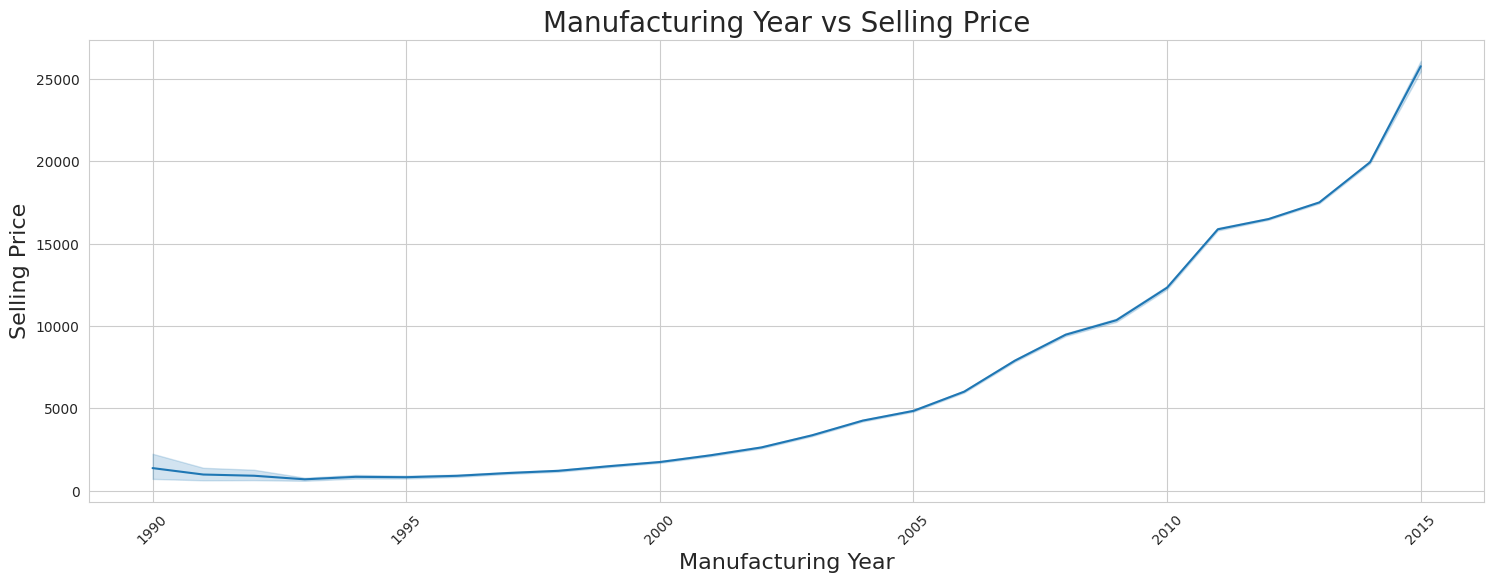

In [ ]:
create_plot(x='year', y='sellingprice', plot_type='line', data=data, title='Manufacturing Year vs Selling Price', xlabel='Manufacturing Year', rotation=45, ylabel='Selling Price')


* Cars manufactured after the year 2000 show an upward trend in selling price. 
* **Technological Advancements:** Newer models often incorporate the latest technology, which can enhance performance, safety, and comfort, contributing to higher prices.
* **Safety and Efficiency:** Improvements in safety features and fuel efficiency make newer cars more attractive to buyers, justifying higher prices.
* **Economic Factors:** Inflation and economic growth over time can increase car prices. The steep rise after 2010 may reflect economic recovery post-recession.



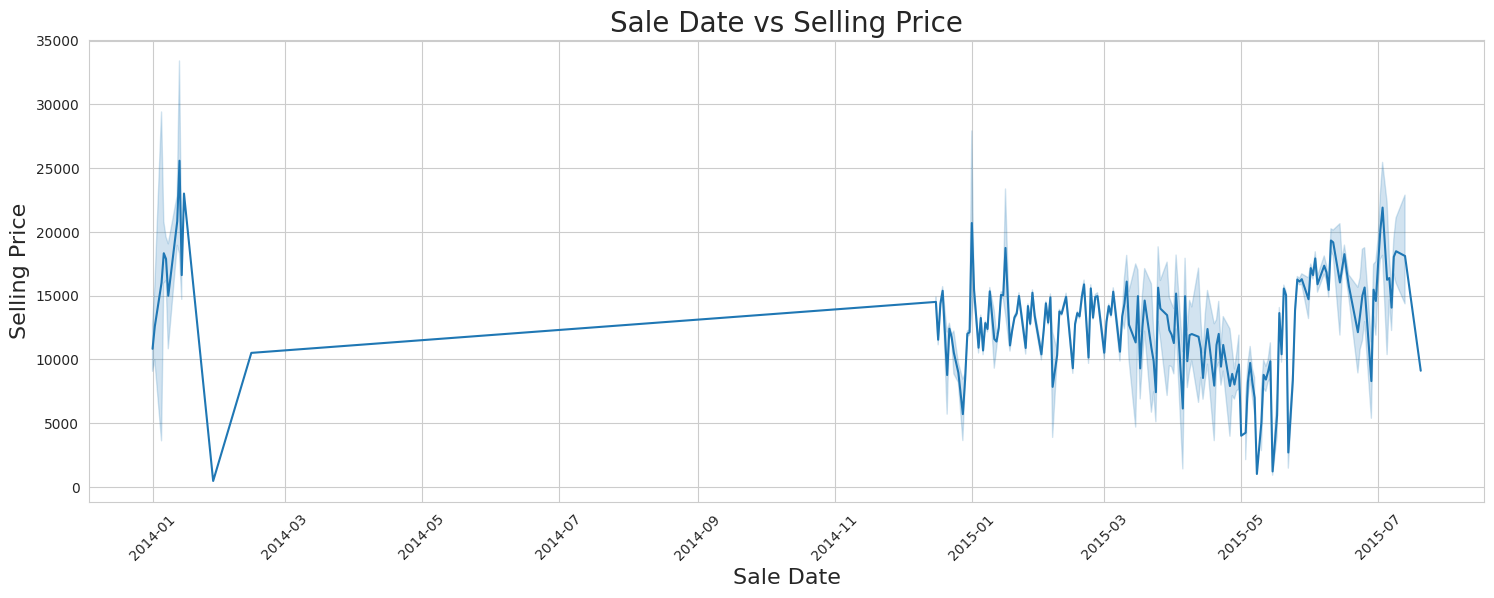

In [ ]:
create_plot(x='saledate', y='sellingprice', plot_type='line', data=data, title='Sale Date vs Selling Price', xlabel='Sale Date', rotation=45, ylabel='Selling Price')

* There is no obvious trend between the date of sale and the selling price of the cars. The selling price does not consistently increase or decrease over time but instead seems to fluctuate randomly. This could suggest that factors other than the timing of the sale, such as the car's condition, features, or market demand, have a more significant impact on the selling price.
* The fluctuating selling prices could reflect market variability, where external factors such as economic conditions, supply and demand, and consumer preferences influence car prices.
* Specific attributes of a car, such as its make, model, condition, mileage, and features, likely have a more direct impact on its selling price than the sale date.
* There may be seasonal trends not captured in the graph, where certain times of the year could see higher or lower car sales, affecting average selling prices.